Prueba de jupyter notebook
Ejemplos de uso de networkx para futuras referrencias

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
# For color mapping
import matplotlib.colors as colors
import matplotlib.cm as cmx

Obtenemos datos de los nodos y enlaces de los csv:

In [6]:
nodes_path = r'C:\Users\proal\Documents\UC3M\2021-2022\2\TFG\algoritmo1\datos\Nodes_t1.csv'
edges_path = r'C:\Users\proal\Documents\UC3M\2021-2022\2\TFG\algoritmo1\datos\Edges_t1.csv'
df_nodes = pd.read_csv(nodes_path, sep = ';',encoding='unicode_escape')
df_edges = pd.read_csv(edges_path, sep = ';',encoding='unicode_escape')

Creamos Grafo direccionado con pesos múltiple:

In [7]:
MDG = nx.MultiDiGraph()
MDG.add_nodes_from(df_nodes['Nodes'])

tuples_from_to = []
for i in range(len(df_edges)):
    #tuples_from_to.append((df_edges['from'][i],df_edges['to'][i],{"weight":df_edges['weight'][i]}))
    tuples_from_to.append((df_edges['from'][i],df_edges['to'][i],df_edges['weight'][i]))
print(tuples_from_to[1][0],',',tuples_from_to[1][1])
MDG.add_weighted_edges_from(tuples_from_to)

191 , 211


Dibujamos grafo de distintas formas
Primero coloreando los enlaces positivos y negativos

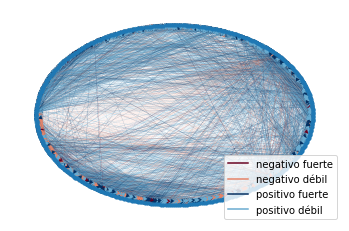

In [8]:
#Creamos leyenda en función de las relaciones en
cNorm = colors.Normalize(vmin = df_edges['weight'].min(), vmax = df_edges['weight'].max())
scalarMap = cmx.ScalarMappable(norm = cNorm, cmap = plt.cm.RdBu)
ColorLegend = {'negativo fuerte': -2, 
           'negativo débil': -1, 
           'positivo fuerte': 2, 
           'positivo débil': 1}

f = plt.figure(1)
ax = f.add_subplot(1,1,1)
for label in ColorLegend:
    ax.plot([0],[0],color=scalarMap.to_rgba(ColorLegend[label]),label=label)

plt.legend(loc = 'lower right')
nx.draw_shell(MDG,node_size=10,width = 0.1,vmin = df_edges['weight'].min(),vmax=df_edges['weight'].max(),edge_color=df_edges['weight'],edge_cmap=plt.cm.RdBu,ax=ax)
plt.show()

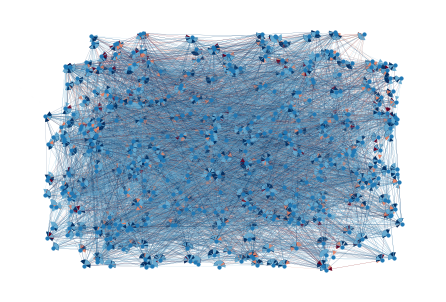

In [9]:
nx.draw_random(MDG,node_size=10,width = 0.1,edge_color=df_edges['weight'],edge_cmap=plt.cm.RdBu)

plt.show()

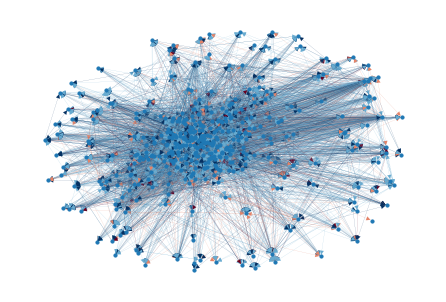

In [10]:
nx.draw_spring(MDG,node_size=10,width = 0.1,edge_color=df_edges['weight'],edge_cmap=plt.cm.RdBu)
plt.show()